In [94]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

In [78]:
player = 'Roger Federer'
filename = "data/{name}.csv".format(name=player.replace(' ', '-'))
# filename = "data/{name}.csv".format(name=player)
df = pd.read_csv(filename, parse_dates=['start date'], dayfirst=True)
# for i in df.columns: print(i)

In [71]:
df.head(3)

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,22.0,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,19.0,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,30.0,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0


In [79]:
df['win'] = df['winner'] == player
# df['win'].mean()
date = df['start date']
df['dblfaults'] = (df['player1 double faults'] / df['player1 total points total'])
df['dblfaults'].head()

0    0.019417
1    0.000000
2    0.020270
3    0.046154
4         NaN
Name: dblfaults, dtype: float64

In [80]:
df['surface']

0         Indoor: Hard
1         Indoor: Hard
2         Indoor: Hard
3         Indoor: Hard
4        Outdoor: Clay
5        Outdoor: Clay
6         Indoor: Hard
7         Indoor: Hard
8         Indoor: Hard
9         Indoor: Hard
10        Indoor: Hard
11      Indoor: Carpet
12      Indoor: Carpet
13        Indoor: Hard
14        Indoor: Hard
15        Indoor: Hard
16        Indoor: Hard
17      Indoor: Carpet
18      Indoor: Carpet
19      Indoor: Carpet
20        Indoor: Hard
21        Indoor: Hard
22       Outdoor: Hard
23       Outdoor: Hard
24       Outdoor: Hard
25       Outdoor: Hard
26       Outdoor: Hard
27       Outdoor: Clay
28       Outdoor: Clay
29       Outdoor: Clay
             ...      
1149     Outdoor: Hard
1150     Outdoor: Hard
1151     Outdoor: Hard
1152     Outdoor: Hard
1153     Outdoor: Hard
1154     Outdoor: Hard
1155     Outdoor: Hard
1156     Outdoor: Hard
1157     Outdoor: Hard
1158     Outdoor: Hard
1159     Outdoor: Hard
1160     Outdoor: Hard
1161     Ou

In [74]:
df['dblfaults'].describe()

count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: dblfaults, dtype: float64

In [75]:
# group df['surface'], in this case surface means type of tennis court
df.groupby('surface')['win'].mean()
# df['win']

surface
Indoor: Carpet    0.736842
Indoor: Clay      0.833333
Indoor: Hard      0.836283
Outdoor: Clay     0.779116
Outdoor: Grass    0.871429
Outdoor: Hard     0.842324
Name: win, dtype: float64

In [76]:
gb = df.groupby('year')
gb['start date']

In [98]:
# print(date.head())
date.dtypes

dtype('<M8[ns]')

(0, 0.06363636363636364)

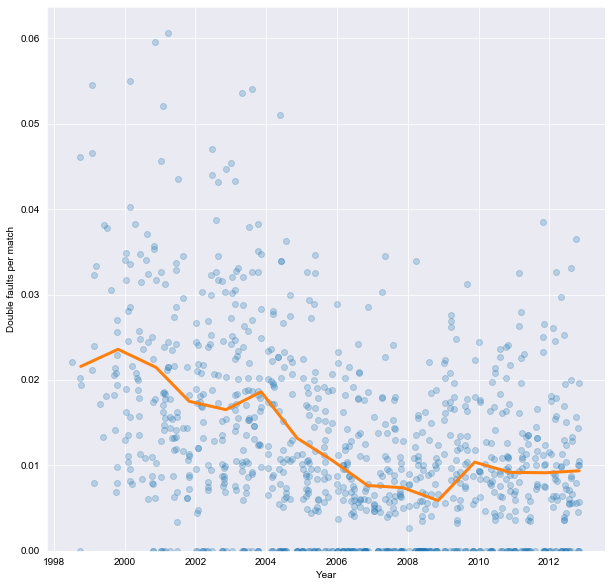

In [103]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.plot_date(date, df['dblfaults'], alpha=.25, lw=0)
ax.plot_date(gb['start date'].max(), gb['dblfaults'].mean(), '-', lw=3)
ax.set_xlabel('Year')
ax.set_ylabel('Double faults per match')
ax.set_ylim(0)